In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys

from scripts.ml_method import *
from scripts.proj1_helpers import *
from scripts.preprocess import *
from scripts.split_data import *
from scripts.model_testing import *
from scripts.cross_validation import *

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# load data
y, x, ind = load_csv_data('higgs-data/train.csv')

In [17]:
# randomly assign values based on distribution of b and s
miss_list = [0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28]
resol = 10
dis_bin_b = np.zeros([len(miss_list), resol])
dis_bin_s = np.zeros([len(miss_list), resol])
min_max_b = np.zeros([len(miss_list),2])
min_max_s = np.zeros([len(miss_list),2])
        
len_y = len(y)

for ind_i, i in enumerate(miss_list):
    # b's distribution 
    mask_b = ((x[:,i] == -999) & (y == -1))
    mask_s = ((x[:,i] == -999) & (y == 1))
    dis_b = x[((x[:,i] != -999) & (y == -1)),i]
    dis_s = x[((x[:,i] != -999) & (y == 1)),i]
    dis = x[(x[:,i] != -999),i]
    mask = (x[:,i] == -999) & (y == -1)
    
#     x[mask, i] = np.random.choice(dis, len(x[mask,i]))
    x[mask_b, i] = np.random.choice(dis_b, len(x[mask_b, i]))
    x[mask_s, i] = np.random.choice(dis_s, len(x[mask_s, i]))

    min_max_b[ind_i, 1] = max_b = dis_b.max()
    min_max_b[ind_i, 0] = min_b = dis_b.min()
    min_max_s[ind_i, 1] = max_s = dis_s.max()
    min_max_s[ind_i, 0] = min_s = dis_s.min()
    width_b = (max_b - min_b)/resol
    width_s = (max_s - min_s)/resol
    
    x_tmp = x[:, i]
    
    for j in range(resol):
        dis_bin_b[ind_i][j] = len(x_tmp[(x_tmp >= (min_b + j * width_b)) & (x_tmp <= (min_b + (j+1) * width_b))])/len_y
        dis_bin_s[ind_i][j] = len(x_tmp[(x_tmp >= (min_s + j * width_s)) & (x_tmp <= (min_s + (j+1) * width_s))])/len_y

In [ ]:
# assign random values to -999
miss_list = [0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28]

for ind_i, i in enumerate(miss_list):
    dis = x[(x[:,i] != -999),i]
    mask = (x[:,i] == -999)

    x[mask, i] = np.random.choice(dis, len(x[mask,i]))

In [18]:
# delete phi features
x = np.delete(x, [11,15,18,20,28],1)

In [22]:
# standardization (insert 0 to missing values)
# stand_x = standardize(x, True)
# stand_x = standardize_with_power_23(x, True)
stand_x = standardize_with_power_terms(x, 4, True)
# stand_x = standardize_with_all_power_2(x, True)

In [23]:
# logistic regression

k_fold = 5
acc_tr = np.zeros(k_fold)
acc_te = np.zeros(k_fold)
weights = np.zeros([k_fold, stand_x.shape[1]])

k_indices = build_k_indices(y, k_fold, 1)

for k in range(k_fold):
    acc_tr[k], acc_te[k], weights[k,:] = cross_validation(y, stand_x, k_indices, k)
    print(acc_tr[k], ', ', acc_te[k])

print('mean te: ', np.mean(acc_te))
print('stdev te: ', np.std(acc_te))
print('mean tr: ', np.mean(acc_tr))
print('stdev tr: ', np.std(acc_tr))

/home/cheng-chun-epfl/Dropbox/EPFL/course/ML_2017/projects/IST-ML-Project1/scripts/ml_method.py:112: RuntimeWarning: divide by zero encountered in log
  loss = ((y + 1)/2).T.dot(np.log(pred)) + ((1 - y)/2).T.dot(np.log(1 - pred))


0.83631 ,  0.83494
0.83612 ,  0.83512
0.835685 ,  0.83716
0.8362 ,  0.83522
0.835705 ,  0.83678
mean te:  0.835844
stdev te:  0.000931527777364
mean tr:  0.836004
stdev tr:  0.000259487957331


In [24]:
# accuracy of average weights

w = np.zeros(stand_x.shape[1])
for i in range(stand_x.shape[1]):
    w[i] = sum(weights[:,i])/k_fold
np.mean(predict_labels(w, stand_x) == y)

0.83602399999999999

In [ ]:
y1, x1, ind = load_csv_data('higgs-data/test.csv')

x1 = np.delete(x1, [11,15,18,20,28],1)

stand_x = standardize_with_power_23(x1, True)

y_pred = predict_labels(w, stand_x)

create_csv_submission(ind, y_pred, 'prediction.csv')

## ------ below is just used to test -----

In [ ]:
x_tr, x_te, y_tr, y_te = split_data(stand_x, y, 0.8, myseed=1)

model = LogisticRegression().fit(x_tr, y_tr)

np.mean(model.predict(x_te) == y_te)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scripts.preprocess import *
import seaborn as sns

In [25]:
data = pd.DataFrame(stand_x)
data['Prediction'] = y

In [26]:
len(data.Prediction[y == 1])
data1 = data.sort_values('Prediction', ascending = False)[0:85667*2]
data2 = data1[0:1000]
# data3 = data1[85667:86667]
data2 = data2.append(data1[85667:86667])

In [28]:
data2['sigmoid'] = sigmoid(data2[data2.columns[0:101]], w)
# data3['sigmoid'] = sigmoid(data3[data3.columns[0:101]], w)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

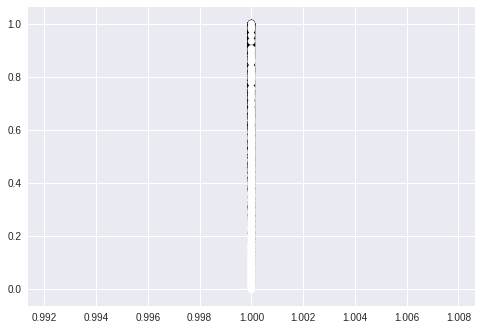

In [35]:
def getFig(i):
    fig, ax = plt.subplots()
    categories = np.unique(data2['Prediction'])
    colors = np.linspace(0, 1, len(categories))
    colordict = dict(zip(categories, colors))  

    data2["Color"] = data2['Prediction'].apply(lambda x: colordict[x])
    ax.scatter(data2[i], data2['sigmoid'], c=data2.Color)
    return fig
# def getFig(frame, i):
#     fig, ax = plt.subplots()
#     categories = np.unique(frame['Prediction'])
#     colors = np.linspace(0, 1, len(categories))
#     colordict = dict(zip(categories, colors))  

#     frame["Color"] = frame['Prediction'].apply(lambda x: colordict[x])
#     fig = ax.scatter(frame[i], frame['sigmoid'], c=data2.Color)    
    
#     return fig
    
for i, ind in enumerate(data2.columns[0:26]):
    fig = getFig(i)
    fig.savefig(ind+'.jpg')
#     fig, axes = plt.subplots(nrows=2, ncols=1)
#     getFig(data2,i)
#     getFig(data3,i)
#     fig1 = fig.get_figure()


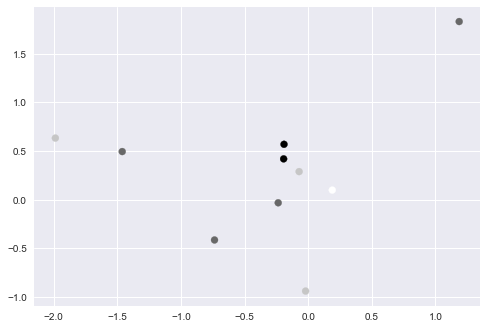

In [52]:
def dfScatter(df, xcol='Height', ycol='Weight', catcol='Gender'):
    fig, ax = plt.subplots()
    categories = np.unique(df[catcol])
    colors = np.linspace(0, 1, len(categories))
    colordict = dict(zip(categories, colors))  

    df["Color"] = df[catcol].apply(lambda x: colordict[x])
    ax.scatter(df[xcol], df[ycol], c=df.Color)
    return fig

if 1:
    df = pd.DataFrame({'Height':np.random.normal(size=10),
                       'Weight':np.random.normal(size=10),
                       'Gender': ["Male","Male","Unknown","Male","Male",
                                  "Female","Did not respond","Unknown","Female","Female"]})    
    fig = dfScatter(df)

In [ ]:
# test the power
# for power in range(2, 10):
#     stand_x = standardize_with_power_terms(x, power, True)

#     k_fold = 10
#     acc_tr = np.zeros(k_fold)
#     acc_te = np.zeros(k_fold)
#     weights = np.zeros([k_fold, stand_x.shape[1]])

#     k_indices = build_k_indices(y, k_fold, 1)
#     print('--------- power ', power, ' ---------')
#     for k in range(k_fold):
#         acc_tr[k], acc_te[k], weights[k,:] = cross_validation(y, stand_x, k_indices, k)
#         print(acc_tr[k], ', ', acc_te[k])

#     print('mean te: ', np.mean(acc_te))
#     print('stdev te: ', np.std(acc_te))
#     print('mean tr: ', np.mean(acc_tr))
#     print('stdev tr: ', np.std(acc_tr))
    
#     w = np.zeros(26 + 25*(power - 1))
#     for i in range(26 + 25*(power - 1)):
#         w[i] = sum(weights[:,i])/10
#     print(np.mean(predict_labels(w, stand_x) == y))